1. Import Library

In [1]:
# Import Library

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

2. Data Cleaning dan Encoding

In [2]:
# Load dataset
df = pd.read_csv('hypertension_dataset.csv')
df.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,Normal,6.4,25.8,NaN,Yes,Low,Non-Smoker,Yes
1,32,11.7,10,Normal,5.4,23.4,NaN,No,Low,Non-Smoker,No
2,78,9.5,3,Normal,7.1,18.7,NaN,No,Moderate,Non-Smoker,No
3,38,10.0,10,Hypertension,4.2,22.1,ACE Inhibitor,No,Low,Non-Smoker,Yes
4,41,9.8,1,Prehypertension,5.8,16.2,Other,No,Moderate,Non-Smoker,No


In [3]:
# Encoding categorical features
label_cols = ['Salt_Intake', 'BP_History', 'Medication', 'Family_History',
              'Exercise_Level', 'Smoking_Status', 'Has_Hypertension']

le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

3. Feature Selection

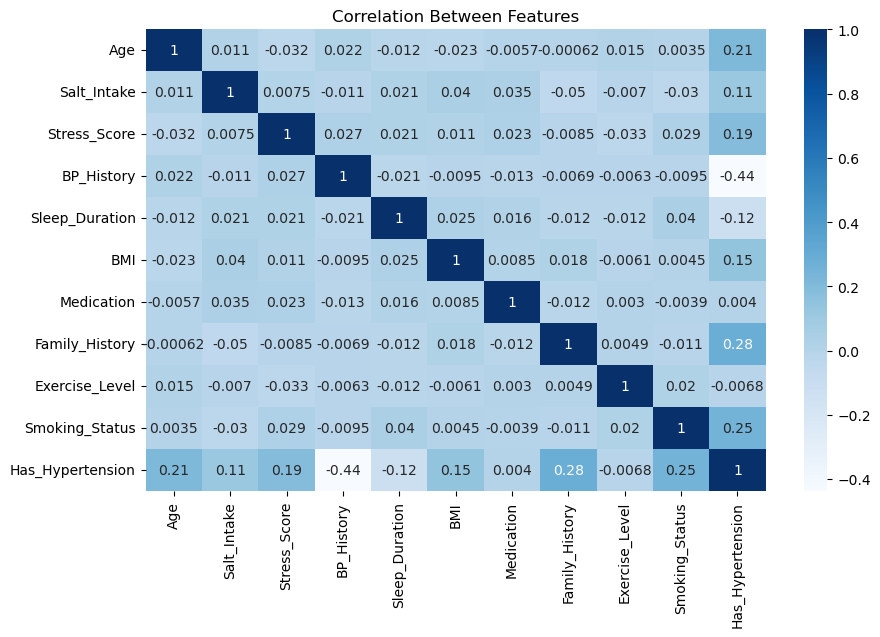

In [4]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Between Features')
plt.show()

4. Splitting data

In [5]:
# Separate features and targets
X = df.drop('Has_Hypertension', axis=1)
y = df['Has_Hypertension']

In [6]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

5. Training Decision Tree

In [7]:
# Training Model
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

6. Model Evaluation

In [9]:
# Test data prediction
y_pred = model.predict(X_test)

In [10]:
# Calculate the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

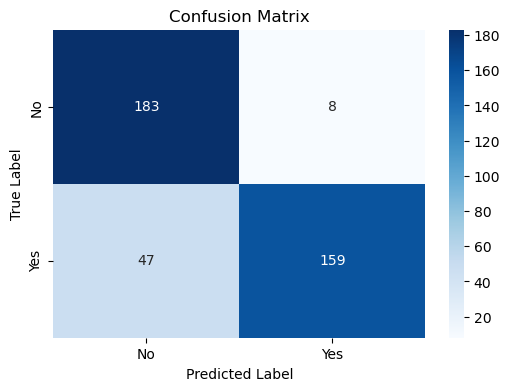

In [11]:
# Plot using heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [12]:
# Result
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8614609571788413
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.96      0.87       191
           1       0.95      0.77      0.85       206

    accuracy                           0.86       397
   macro avg       0.87      0.86      0.86       397
weighted avg       0.88      0.86      0.86       397



7. Decision Tree Visualization

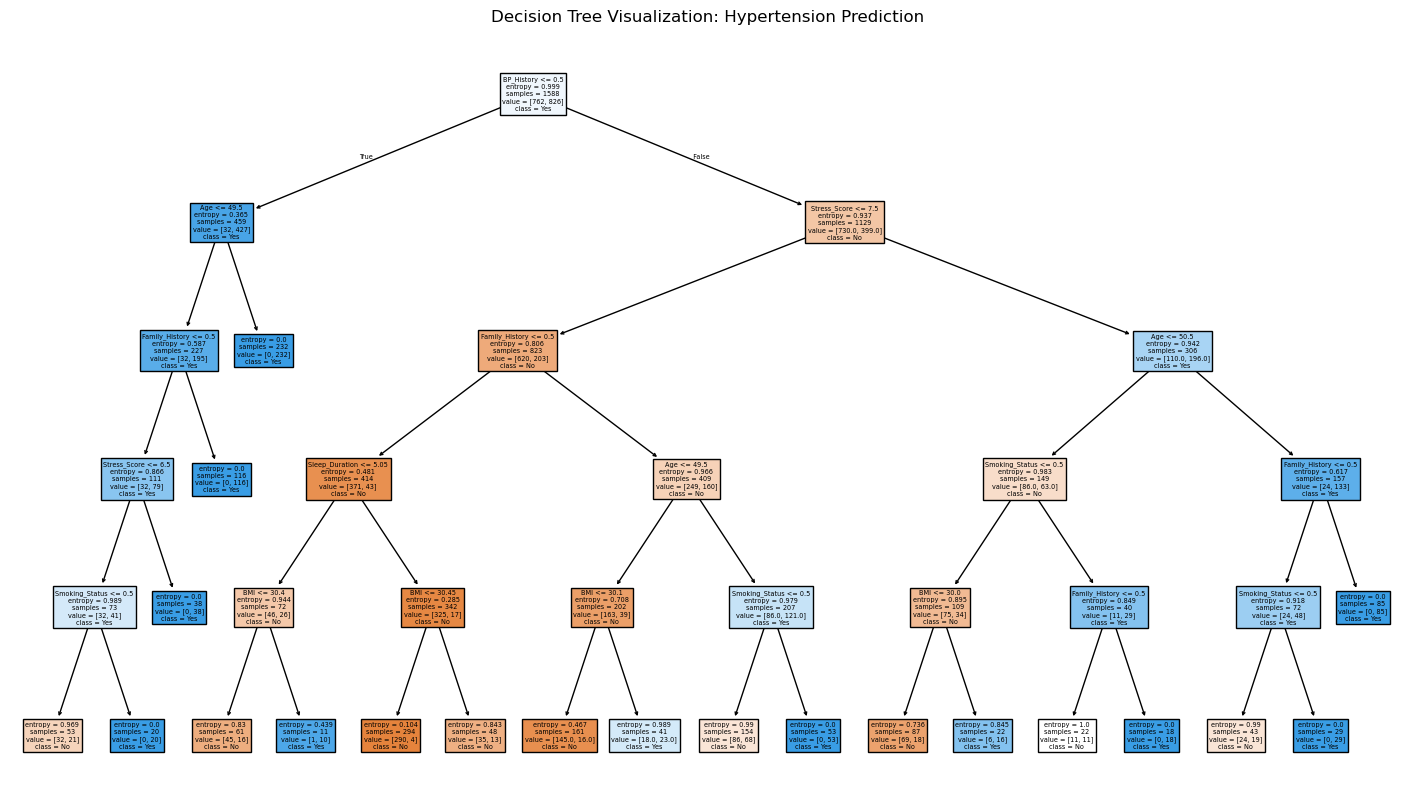

In [14]:
# Tree Visualization
plt.figure(figsize=(18,10))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree Visualization: Hypertension Prediction")
plt.show()

8. Feature Importance

In [16]:
importances = model.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:\n", feature_importance)

Feature Importance:
           Feature  Importance
3      BP_History    0.363267
7  Family_History    0.149945
2    Stress_Score    0.131253
0             Age    0.129446
9  Smoking_Status    0.110293
5             BMI    0.081831
4  Sleep_Duration    0.033965
1     Salt_Intake    0.000000
6      Medication    0.000000
8  Exercise_Level    0.000000


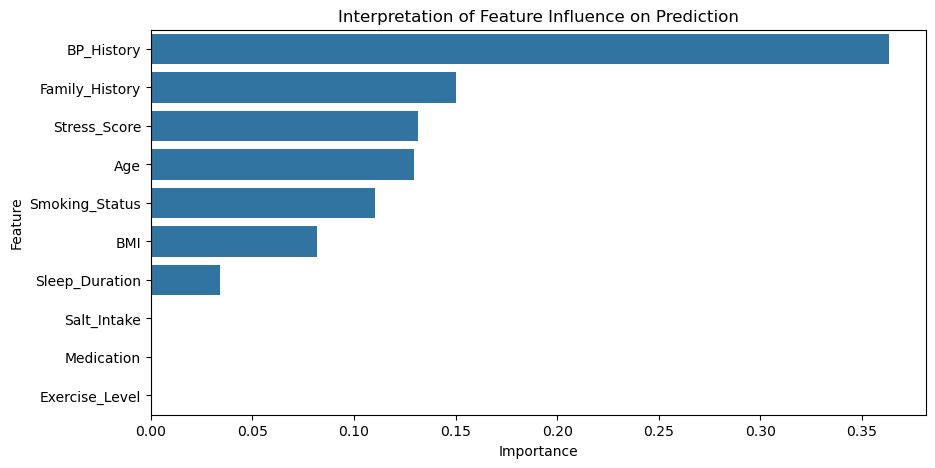

In [17]:
# Visualization
plt.figure(figsize=(10,5))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Interpretation of Feature Influence on Prediction')
plt.show()

9. Hyperparameter Tuning

In [20]:
X_train = X_train.fillna(0)

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                           param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:")
for param, value in grid_search.best_params_.items():
    print(f"- {param}: {value}")
print("Best Accuracy:", grid_search.best_score_)

Best Parameters:
- criterion: entropy
- max_depth: 10
- min_samples_split: 2
Best Accuracy: 0.9540444021189215


10. Cross Validation

In [21]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross Validation Scores: [0.83627204 0.83627204 0.84130982 0.8488665  0.82871537]
Mean CV Accuracy: 0.8382871536523929
